<h1>Machine Learning with Neural Networks Using scikit-learn</h1>

The aim of this project is to build a classification model to detect diabetes.  </br>The diabetes dataset has the following attributes:

1. pregnancies - Number of times pregnant. </br>
2. glucose - Plasma glucose concentration.  </br>
3. diastolic - Diastolic blood pressure (mm Hg).  </br>
4. triceps - Skinfold thickness (mm).  </br>
5. insulin - Hour serum insulin (mu U/ml).  </br>
6. bmi – Basal metabolic rate (weight in kg/height in m).  </br>
7. dpf - Diabetes pedigree function.  </br>
8. age - Age in years.  </br>
9. diabetes - “1” represents the presence of diabetes while “0” represents the absence of it. This is the target variable

<h2>Evaluation Metric</h2>
We will evaluate the performance of the model using accuracy, which represents the percentage of cases correctly classified.

We will follow the following steps:

Step 1 - Loading the required libraries and modules.

Step 2 - Reading the data and performing basic data checks.

Step 3 - Creating arrays for the features and the response variable.

Step 4 - Creating the training and test datasets.

Step 5 - Building , predicting, and evaluating the neural network model.

<h3>Step 1 - Loading the Required Libraries and Modules</h3>

In [85]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

<h3>Step 2 - Reading the Data and Performing Basic Data Checks</h3>

In [86]:
df = pd.read_csv('pima-indians-diabetes.csv') 
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
df.shape

(768, 9)

In [88]:
df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
class                       0
dtype: int64

In [89]:
df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
class                         int64
dtype: object

In [90]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


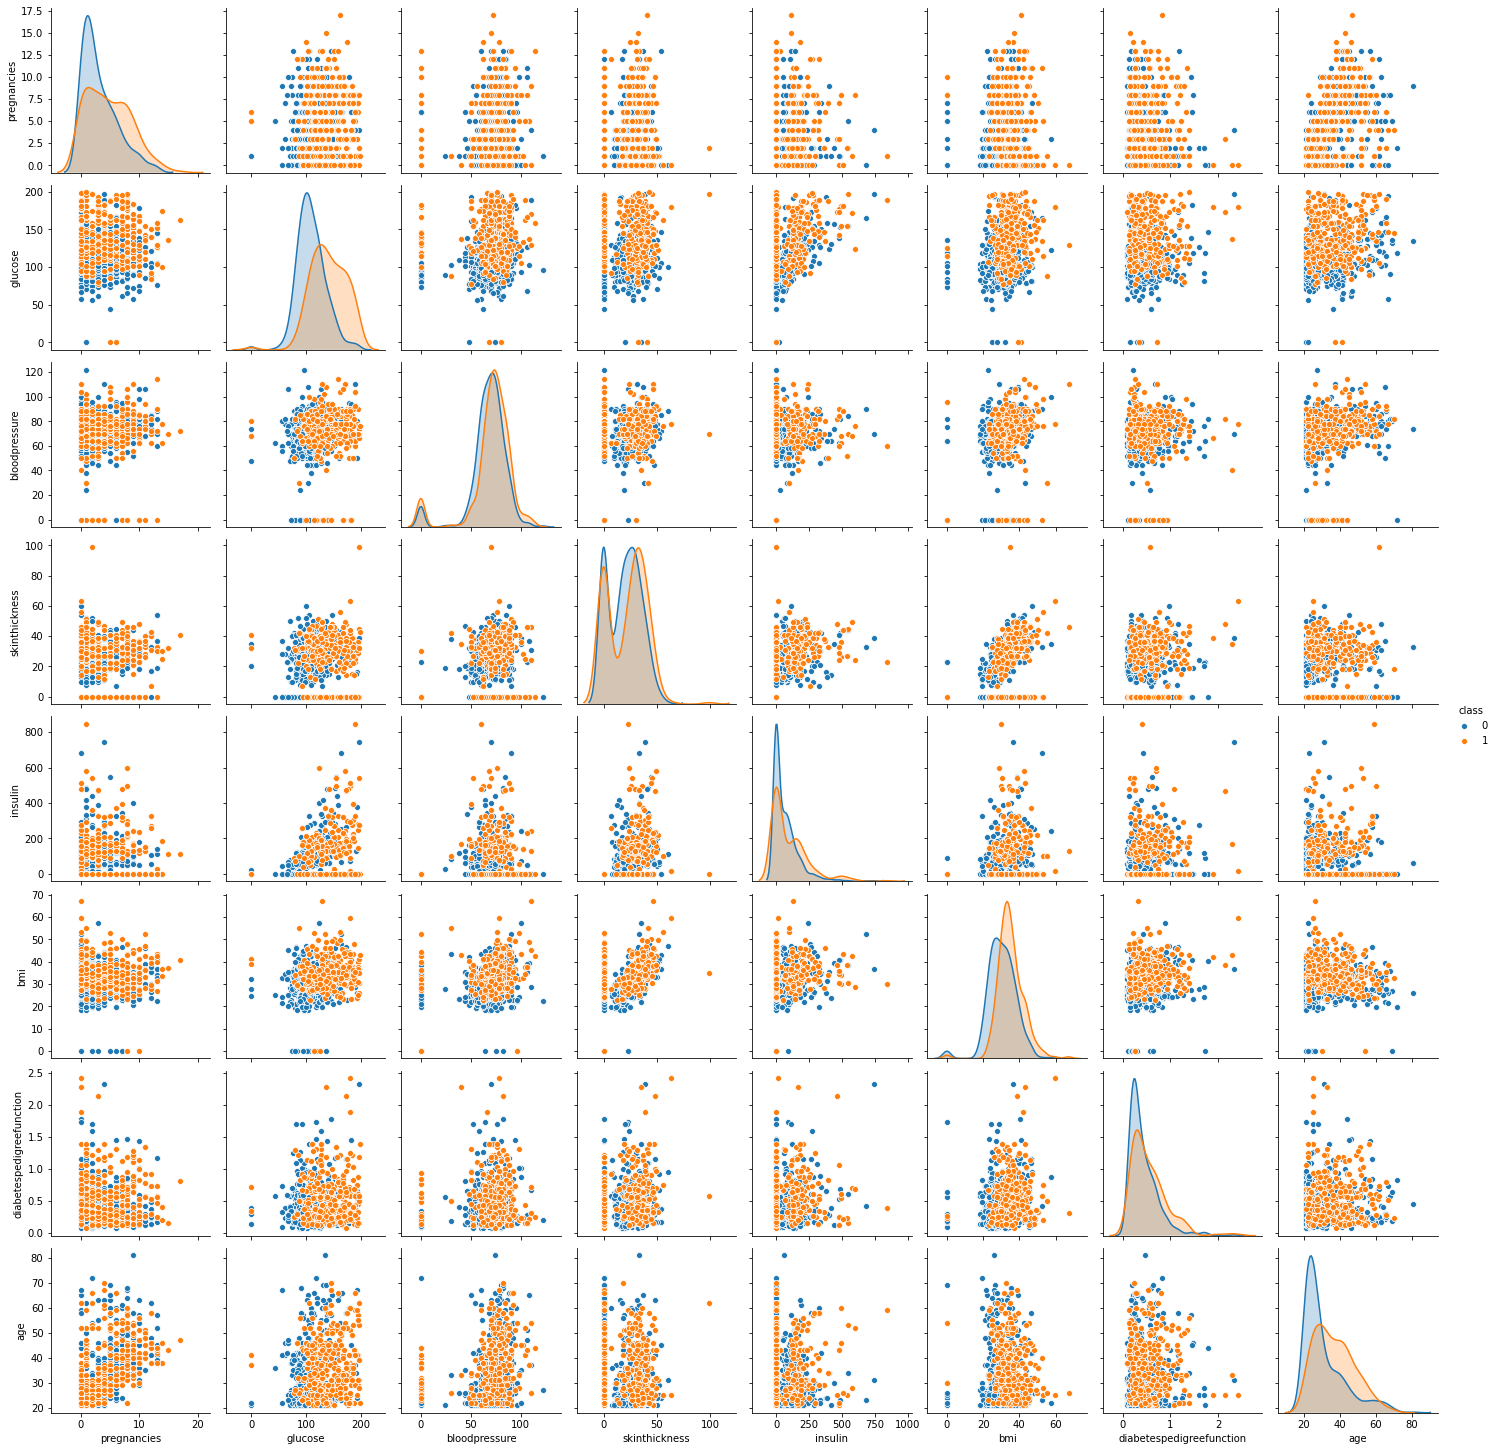

In [91]:
import seaborn as sns

sns.pairplot(df,hue='class')

In [92]:
target_column = ['class'] 

#List of predictor attributes other than class
predictors = list(set(list(df.columns))-set(target_column))

predictors

['glucose',
 'skinthickness',
 'age',
 'insulin',
 'bmi',
 'diabetespedigreefunction',
 'pregnancies',
 'bloodpressure']

In [93]:
#Normalize the predictor attributes
df[predictors] = df[predictors]/df[predictors].max()

df[predictors]

,glucose,skinthickness,age,insulin,bmi,diabetespedigreefunction,pregnancies,bloodpressure
0,0.743719,0.353535,0.617284,0.000000,0.500745,0.259091,0.352941,0.590164
1,0.427136,0.292929,0.382716,0.000000,0.396423,0.145041,0.058824,0.540984
2,0.919598,0.000000,0.395062,0.000000,0.347243,0.277686,0.470588,0.524590
3,0.447236,0.232323,0.259259,0.111111,0.418778,0.069008,0.058824,0.540984
4,0.688442,0.353535,0.407407,0.198582,0.642325,0.945455,0.000000,0.327869
...,...,...,...,...,...,...,...,...
763,0.507538,0.484848,0.777778,0.212766,0.490313,0.070661,0.588235,0.622951
764,0.613065,0.272727,0.333333,0.000000,0.548435,0.140496,0.117647,0.573770
765,0.608040,0.232323,0.370370,0.132388,0.390462,0.101240,0.294118,0.590164
766,0.633166,0.000000,0.580247,0.000000,0.448584,0.144215,0.058824,0.491803


In [94]:
#Describe the normalized data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,0.226180,0.198210,0.000000,0.058824,0.176471,0.352941,1.0
glucose,768.0,0.607510,0.160666,0.000000,0.497487,0.587940,0.704774,1.0
bloodpressure,768.0,0.566438,0.158654,0.000000,0.508197,0.590164,0.655738,1.0
skinthickness,768.0,0.207439,0.161134,0.000000,0.000000,0.232323,0.323232,1.0
insulin,768.0,0.094326,0.136222,0.000000,0.000000,0.036052,0.150414,1.0
bmi,768.0,0.476790,0.117499,0.000000,0.406855,0.476900,0.545455,1.0
diabetespedigreefunction,768.0,0.194990,0.136913,0.032231,0.100723,0.153926,0.258781,1.0
age,768.0,0.410381,0.145188,0.259259,0.296296,0.358025,0.506173,1.0
class,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.0


<h2>Step 4 - Creating the Training and Test Datasets</h2>

In [95]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)


In [96]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [97]:
print(y_train.shape)
print(y_test.shape)

(614, 1)
(154, 1)


<h2>Step 5 - Building, Predicting, and Evaluating the Neural Network Model</h2>

In [98]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(confusion_matrix(y_train,predict_train))

[[347  58]
 [ 80 129]]


In [101]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       405
           1       0.69      0.62      0.65       209

    accuracy                           0.78       614
   macro avg       0.75      0.74      0.74       614
weighted avg       0.77      0.78      0.77       614



In [102]:
print(confusion_matrix(y_test,predict_test))


[[83 12]
 [25 34]]


In [103]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        95
           1       0.74      0.58      0.65        59

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154



In [104]:
predict_test.shape

(154,)

In [105]:
y_test = y_test.reshape(154,)

In [107]:
y_test.shape

(154,)

In [106]:
df= pd.DataFrame({'Actual':y_test,'Predicted':predict_test})
df

,Actual,Predicted
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
149,0,0
150,1,1
151,1,1
152,0,0
